<a href="https://colab.research.google.com/github/mochammadcholilurrokhman/PCVK_Ganjil_Mochammad-Cholilur-Rokhman/blob/main/Week12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MODUL 12 – Feature Matching, Face Detection, Face Tracking

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab
terhubung dengan Github Anda, buat notebook baru dan beri nama “Week12.ipynb”.
Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan
seperti biasa.

In [117]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

2.  Lakukan Face Detection untuk image object lain yang tersedia pada (/images/facedet).
Tampilkan seperti pada contoh berikut.
  Perhatikan pada hasil face detection diatas. Secara keseluruhan, face detection
  dapat dilakukan dengan baik, bahkan untuk image berupa gambar bukan foto, wajah
  bermasker, atau wajah yang berukuran kecil (solvay).

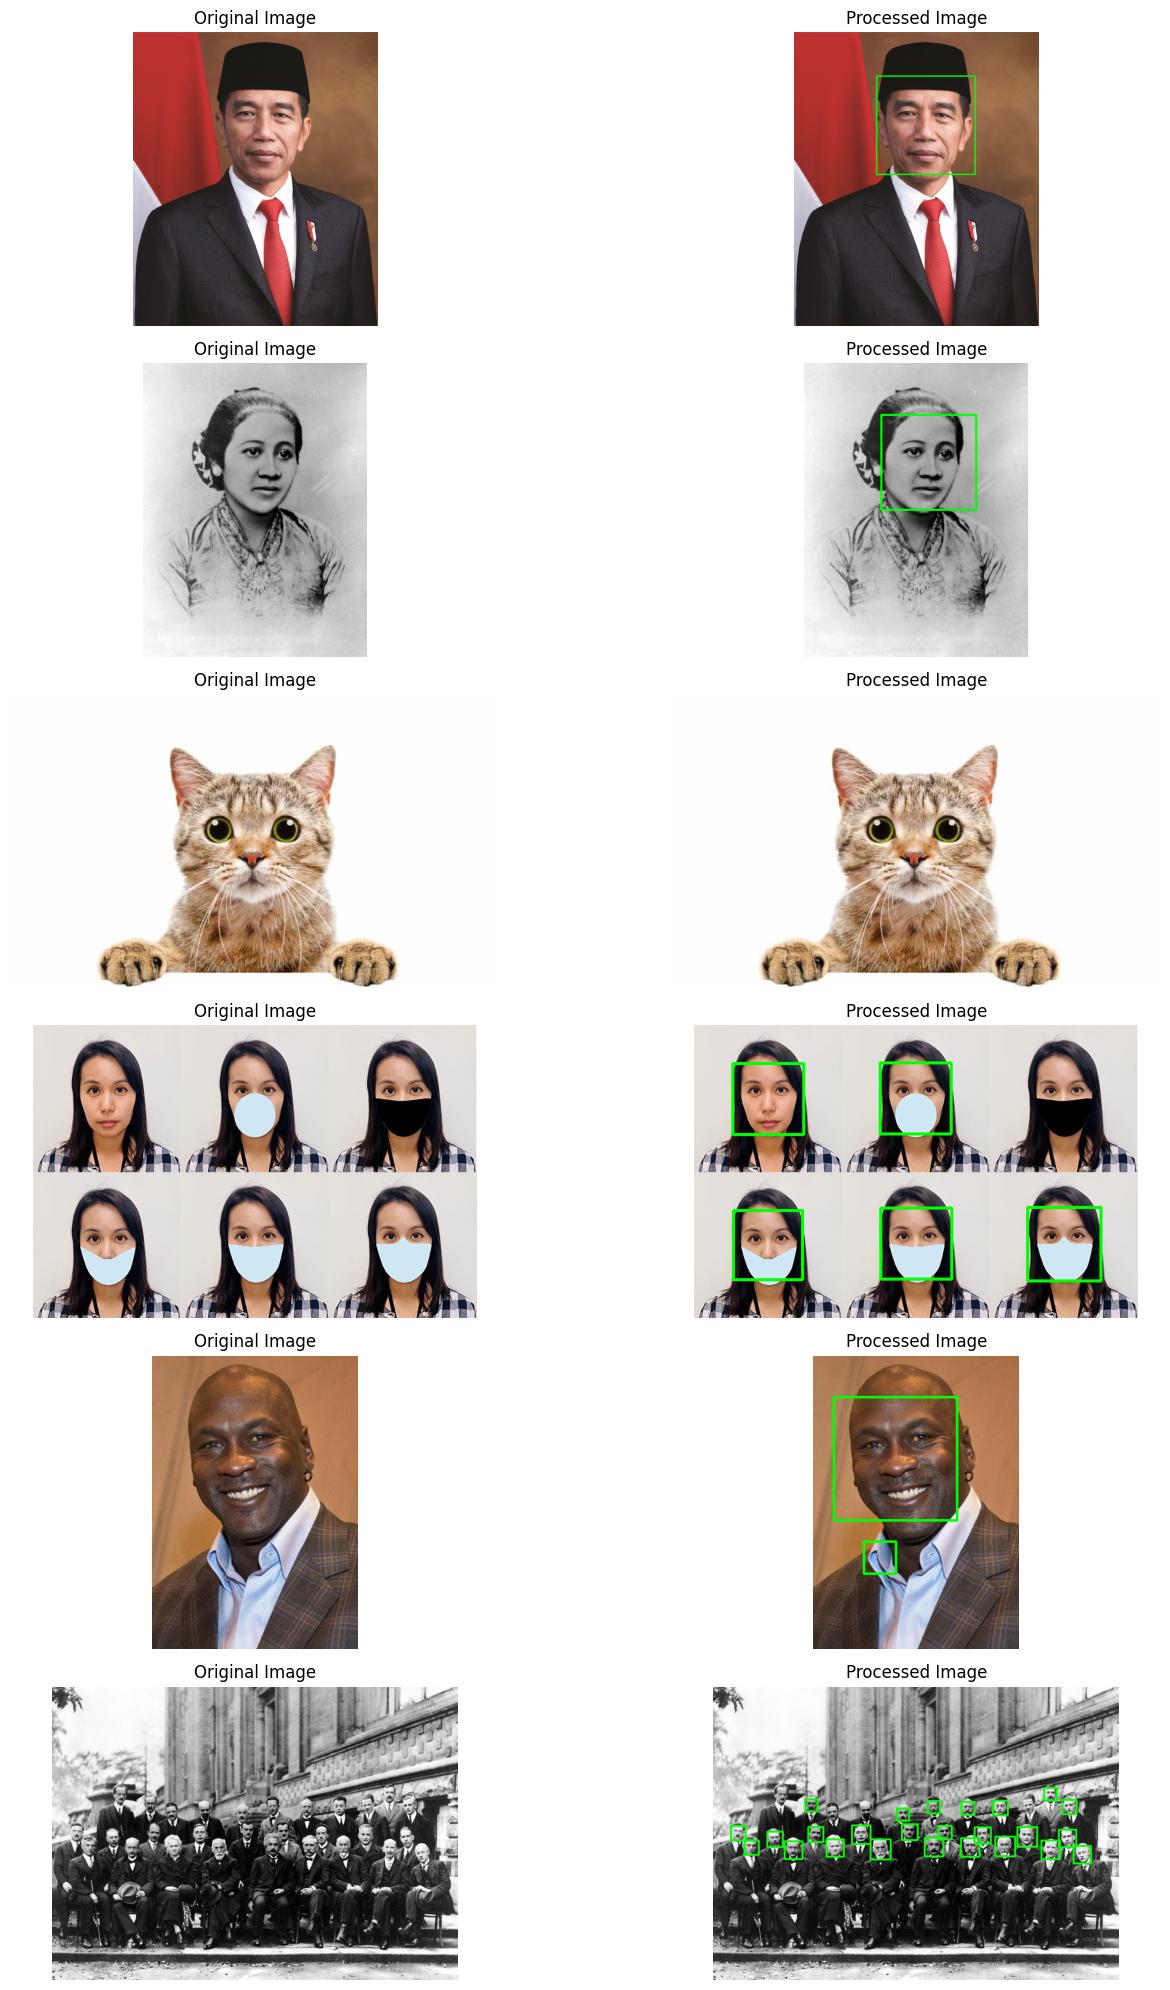

In [137]:
# Fungsi untuk mengonversi gambar ke RGB
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Fungsi untuk mendeteksi wajah dan menggambar kotak
def detect_and_draw_faces(image, classifier, scaleFactor=1.1, minNeighbors=6):
    faces_rects = classifier.detectMultiScale(image, scaleFactor=scaleFactor, minNeighbors=minNeighbors)
    for (x, y, w, h) in faces_rects:
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 3)
    return image

# Membaca gambar
image_paths = [
    "/content/drive/MyDrive/PCVK/facedet/jokowi.jpg",
    "/content/drive/MyDrive/PCVK/facedet/kartini.jpg",
    "/content/drive/MyDrive/PCVK/facedet/kucing.jpg",
    "/content/drive/MyDrive/PCVK/facedet/mask.png",
    "/content/drive/MyDrive/PCVK/facedet/mjordan.jpg",
    "/content/drive/MyDrive/PCVK/facedet/solvayconf.jpg"
]

images = [cv2.imread(path) for path in image_paths]

# Menginisialisasi classifier
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Deteksi wajah pada setiap gambar
processed_images = [detect_and_draw_faces(img.copy(), faceCascade) for img in images]

# Menampilkan gambar asli dan hasil deteksi wajah
f, axarr = plt.subplots(len(images), 2, figsize=(15, 20))

for i, (original, processed) in enumerate(zip(images, processed_images)):
    axarr[i, 0].imshow(convertToRGB(original))
    axarr[i, 0].set_title("Original Image")
    axarr[i, 0].axis("off")

    axarr[i, 1].imshow(convertToRGB(processed))
    axarr[i, 1].set_title("Processed Image")
    axarr[i, 1].axis("off")

plt.tight_layout()
plt.show()


3. Pada Soal No.2. wajah kucing tidak bisa dideteksi dengan baik. Lakukan deteksi wajah
kucing hingga muncul rectangle pada bagian wajahnya. Petunjuk pada soal ini,
perhatikan pretrained features yang telah disediakan OpenCV. Gunakan xml yang ada
jika memang telah disediakan. Jika belum ada, coba cari dengan searching melalui
search engines.

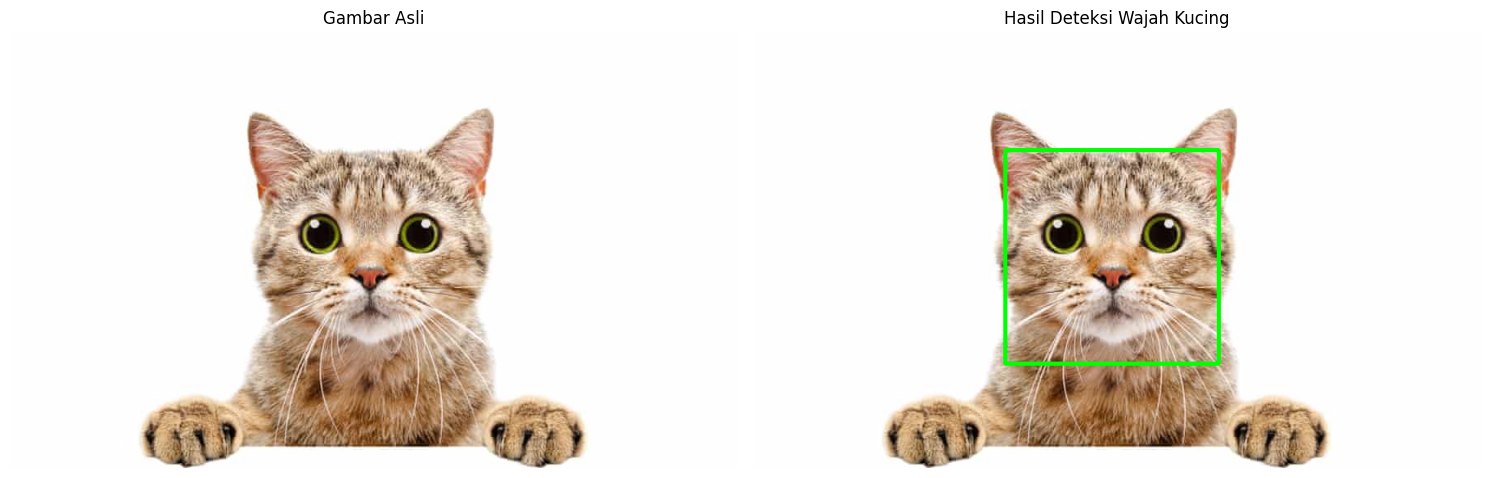

In [120]:
# Fungsi untuk mengonversi gambar ke RGB
def convertToRGB(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Inisialisasi cascade untuk mendeteksi wajah kucing
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalcatface.xml")

# Membaca gambar kucing
kucing_img2 = cv2.imread('/content/drive/MyDrive/PCVK/facedet/kucing.jpg')
kucing_img2_rgb = convertToRGB(kucing_img2)

## Fungsi untuk memilih satu kotak deteksi terbaik (misalnya kotak terbesar)
def filter_largest_face(faces_rects):
    if len(faces_rects) == 0:
        return []
    # Urutkan kotak berdasarkan area (w * h), lalu pilih kotak terbesar
    faces_rects = sorted(faces_rects, key=lambda x: x[2] * x[3], reverse=True)
    return [faces_rects[0]]  # Ambil hanya kotak terbesar

# Deteksi wajah kucing
roi_wajah = cascade_wajah.detectMultiScale(kucing_img2, scaleFactor=1.1, minNeighbors=6)

# Pilih kotak terbesar saja
filtered_faces = filter_largest_face(roi_wajah)

# Gambar kotak di wajah kucing
for (x, y, w, h) in filtered_faces:
    cv2.rectangle(kucing_img2, (x, y), (x + w, y + h), (0, 255, 0), 3)

# Menampilkan gambar asli dan hasil deteksi
f, axarr = plt.subplots(1, 2, figsize=(15, 5))
axarr[0].imshow(kucing_img2_rgb)
axarr[0].set_title("Gambar Asli")
axarr[0].axis("off")

axarr[1].imshow(convertToRGB(kucing_img2))
axarr[1].set_title("Hasil Deteksi Wajah Kucing")
axarr[1].axis("off")

plt.tight_layout()
plt.show()



4. Cobakan juga untuk eyes detection.

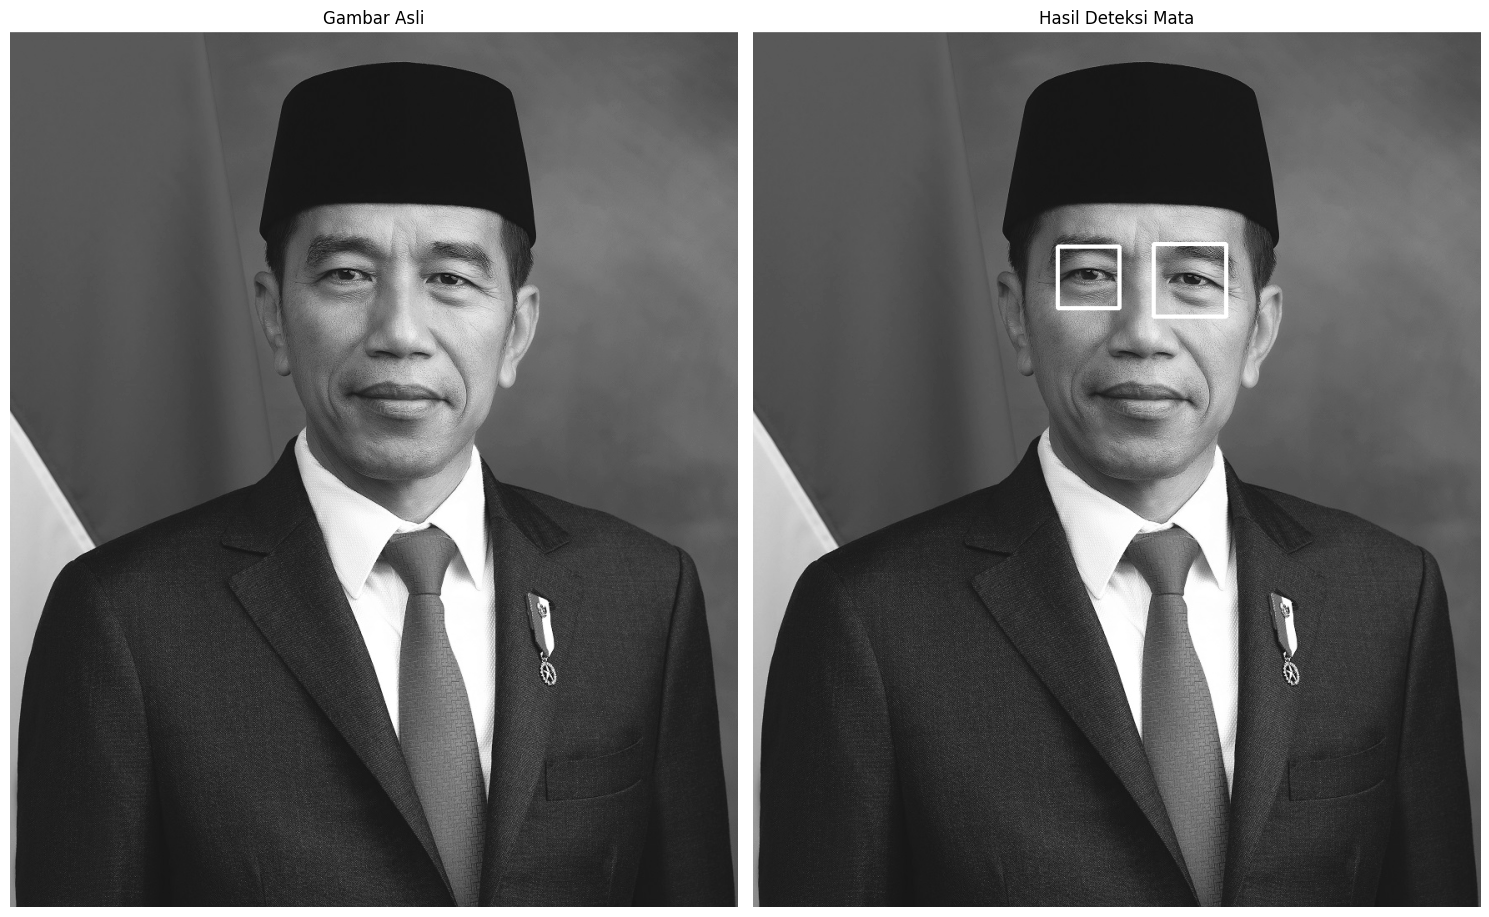

In [121]:
# Fungsi untuk mengonversi gambar ke grayscale
def convertToGRAY(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Inisialisasi cascade untuk mendeteksi mata
cascade_wajah = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_eye.xml")

# Membaca gambar Jokowi
jokowi = cv2.imread('/content/drive/MyDrive/PCVK/facedet/jokowi.jpg')

# Mengonversi gambar ke grayscale
jokowi_gray = convertToGRAY(jokowi)

# Deteksi mata pada gambar grayscale
roi_wajah = cascade_wajah.detectMultiScale(jokowi_gray, scaleFactor=1.1, minNeighbors=5)

# Gambar kotak di sekitar mata
for (x, y, w, h) in roi_wajah:
    cv2.rectangle(jokowi_gray, (x, y), (x + w, y + h), (255, 255, 255), 3)

# Menampilkan gambar asli dan hasil deteksi
f, axarr = plt.subplots(1, 2, figsize=(15, 15))

# Menampilkan gambar asli pada subplot pertama
axarr[0].imshow(convertToGRAY(jokowi), cmap='gray')
axarr[0].set_title("Gambar Asli")
axarr[0].axis("off")

# Menampilkan hasil deteksi mata pada subplot kedua
axarr[1].imshow(jokowi_gray, cmap='gray')
axarr[1].set_title("Hasil Deteksi Mata")
axarr[1].axis("off")

plt.tight_layout()
plt.show()


5. Lakukan Face Tracking menggunakan Google Colab. Petunjuk, Tutorial selengkapnya
tentang akses kamera dan FaceDetection pada google colab dapat dilihat di link
berikut: https://www.youtube.com/watch?v=YjWh7QvVH60

In [136]:
import cv2 as cv
import numpy as np
import io
import PIL.Image
from base64 import b64decode, b64encode

# Fungsi untuk mengonversi base64 menjadi gambar
def js_to_image(js_reply):
    image_bytes = b64decode(js_reply.split(',')[1])
    jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
    img = cv.imdecode(jpg_as_np, flags=1)
    return img

# Fungsi untuk mengonversi bounding box menjadi bytes dalam format base64
def bbox_to_bytes(bbox_array):
    # Konversi array ke gambar dengan mode 'RGBA'
    bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')

    # Membuat buffer dalam format PNG
    iobuf = io.BytesIO()
    bbox_PIL.save(iobuf, format='PNG')

    # Menyimpan gambar PNG dalam format base64
    bbox_bytes = b64encode(iobuf.getvalue()).decode('utf-8')
    return 'data:image/png;base64,' + bbox_bytes

# Inisialisasi classifier untuk deteksi wajah
cascade_face = cv.CascadeClassifier(cv.data.haarcascades + "haarcascade_frontalface_alt.xml")


<IPython.core.display.Javascript object>

(480, 640)
Saved to photo.jpg


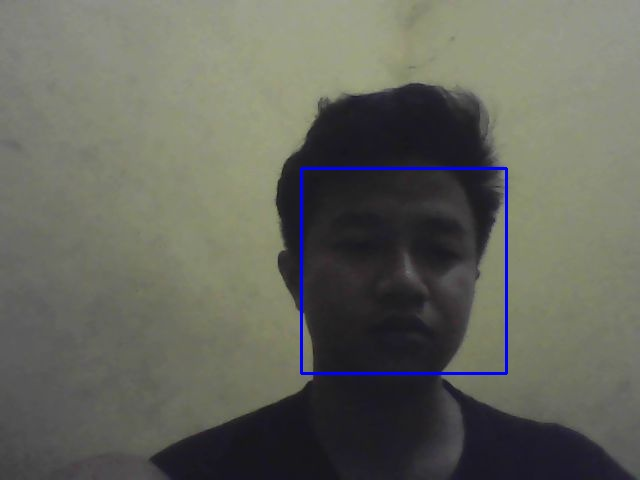

In [135]:
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
# Fungsi untuk mengambil foto dan mendeteksi wajah
def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
      async function takePhoto(quality){
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        document.body.appendChild(div);
        div.appendChild(video);
        video.srcObject = stream;
        await video.play();

        google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        div.remove();
        return canvas.toDataURL('image/jpeg', quality);
      }
      ''')
    display(js)

    data = eval_js('takePhoto({})'.format(quality))
    img = js_to_image(data)

    # Mengubah gambar ke grayscale untuk deteksi wajah
    gray = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
    print(gray.shape)

    # Mendeteksi wajah dengan cascade classifier
    faces = cascade_face.detectMultiScale(gray)
    for (x, y, w, h) in faces:
        img = cv.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)  # Menambahkan kotak wajah

    # Menyimpan gambar hasil deteksi wajah
    cv.imwrite(filename, img)

    # Mengembalikan nama file gambar
    return filename

# Menangkap gambar dan menampilkan hasilnya
try:
    filename = take_photo('photo.jpg')  # Nama file untuk gambar yang akan disimpan
    print('Saved to {}'.format(filename))
    display(Image(filename))  # Menampilkan gambar hasil deteksi wajah
except Exception as err:
    print(str(err))

6. Lakukan Blurring pada bagian wajah yang terdeteksi. Berikut contoh keluarannya.
Petunjuk: anda dapat menggunakan cv.medianBlur untuk melakukan Blurring

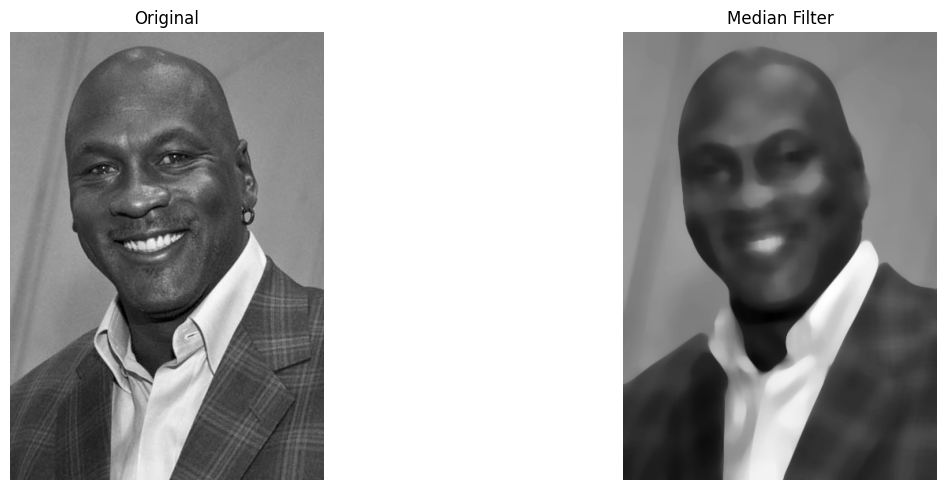

In [124]:
# Membaca gambar (Pastikan anda sudah mendefinisikan jordan_img1 sebelumnya)
jordan_img1 = cv2.imread('/content/drive/MyDrive/PCVK/facedet/mjordan.jpg')  # Ganti dengan path gambar Anda

# Mengubah gambar menjadi grayscale
image = cv2.cvtColor(jordan_img1, cv2.COLOR_BGR2GRAY)

# Ukuran kernel untuk median filter
figure_size = 21

# Menggunakan Median Blur
new_image = cv2.medianBlur(image, figure_size)

# Menampilkan gambar
f, axarr = plt.subplots(1, 2, figsize=(15, 5))

# Menampilkan gambar asli
axarr[0].imshow(image, cmap='gray')
axarr[0].set_title('Original')
axarr[0].axis('off')

# Menampilkan gambar dengan median filter
axarr[1].imshow(new_image, cmap='gray')
axarr[1].set_title('Median Filter')
axarr[1].axis('off')
# Menampilkan plot
plt.tight_layout()
plt.show()


7. Lakukan segmentasi karakter pada KTP seperti gambar berikut

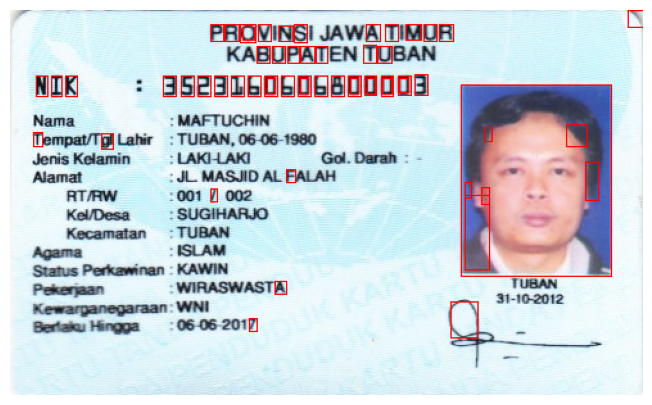

In [125]:
# Membaca gambar
ktp = cv.imread("/content/drive/MyDrive/PCVK/ktp3.jpg")

# Filtering dengan Gaussian Blur
blurred = cv.GaussianBlur(ktp, (5, 5), 0)

# Ubah ke citra keabuan
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi citra dengan Adaptive Thresholding
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY_INV, 11, 5)

# Ekstraksi kontur
contours, hierarchy = cv.findContours(bw.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

# Gambar hasil biner
plt.figure(figsize=(15, 5))

# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.imshow(cv.cvtColor(ktp, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


8. Lakukan cropping pada bagian NIK saja sehingga muncul hasil sebagai berikut

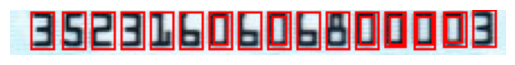

In [126]:
cropped_nik = ktp[50:70, 110:330]

plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

9. Kita akan menggunakan Deep Learning untuk melakukan pengenalan karakter
Sebelum melakukan training data, terlebih dahulu di siapkan data yang akan dilakukan
training yaitu data image nomor angka 0-9. Untuk membuat data tersebut bisa
gunakan image editor untuk dilakukan croping satu persatu. Kemudian selanjutnya
gunakan source code di bawah ini untuk proses persiapan untuk training.


In [127]:
import os
import cv2
import numpy as np
import pickle
import tensorflow as tf
from keras.utils import to_categorical
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, ZeroPadding2D
from keras.models import Model
from keras.optimizers import Adam

# Load dataset MNIST
(X_train, y_train), (_, _) = tf.keras.datasets.mnist.load_data()

# Jumlah data yang ingin diambil dari setiap kategori
num_samples_per_class = 100

# List digit yang akan diambil (0 sampai 9)
digits_to_extract = list(range(10))

# Fungsi untuk mengambil sampel dari setiap kategori
def extract_samples(X, y, digits, num_samples):
    samples = []
    for digit in digits:
        digit_indices = np.where(y == digit)[0]
        selected_indices = np.random.choice(digit_indices, num_samples, replace=False)
        samples.extend([(X[i], digit) for i in selected_indices])
    return samples

# Ambil sampel dari setiap kategori
training_data = extract_samples(X_train, y_train, digits_to_extract, num_samples_per_class)

# Acak urutan data
np.random.shuffle(training_data)

# Pisahkan fitur dan label
X, Y = zip(*training_data)

# Konversi menjadi numpy array
X = np.array(X).reshape(-1, 28, 28, 1)

# Tulis ke file pickle
pickle_out = open("X_mnist.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("Y_mnist.pickle", "wb")
pickle.dump(to_categorical(Y, num_classes=10), pickle_out)
pickle_out.close()

10. Lakukan Training Data

In [128]:
# Load dataset
pickle_in = open("X_mnist.pickle", "rb")
X = pickle.load(pickle_in)

pickle_in = open("Y_mnist.pickle", "rb")
Y = pickle.load(pickle_in)

# Image dimensions
width, height = 28, 28  # Sesuaikan dengan ukuran gambar MNIST

# Input layer
inputs = Input(shape=(width, height, 1))

# First Convolutional Block
conv_layer = ZeroPadding2D(padding=(2, 2))(inputs)
conv_layer = Conv2D(16, (5, 5), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)

# Second Convolutional Block
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = Conv2D(32, (3, 3), strides=(1, 1), activation='relu')(conv_layer)
conv_layer = MaxPooling2D((2, 2))(conv_layer)

# Third Convolutional Block
conv_layer = Conv2D(64, (3, 3), strides=(1, 1), activation='relu')(conv_layer)

# Flatten the output of convolutional layers
flaten = Flatten()(conv_layer)

# Fully connected layers
fc_layer = Dense(256, activation='relu')(flaten)
fc_layer = Dense(64, activation='relu')(fc_layer)

# Output layer (10 classes for MNIST)
outputs = Dense(10, activation='softmax')(fc_layer)

# Compile the model
adam = Adam(learning_rate=0.0001)
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X, Y, epochs=20, verbose=1)

# Save the model with the .keras extension
model.save('anpr_model.keras')  # Using .keras format


Epoch 1/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.1583 - loss: 11.5406
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.4936 - loss: 1.7569
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.7056 - loss: 0.9550
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.7908 - loss: 0.6760
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 54ms/step - accuracy: 0.8735 - loss: 0.4129
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - accuracy: 0.9062 - loss: 0.3678
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.9506 - loss: 0.2145
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9624 - loss: 0.1834
Epoch 9/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9622 - loss: 0.1540
Epoch 10/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9777 - loss: 0.1202
Epoch 11/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9892 - loss: 0.0864
Epoch 12/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy

11. Testing Data

In [129]:
# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr_model.keras")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Ubah label ke dalam format one-hot encoding
Y_test_one_hot = to_categorical(Y_test)

# Evaluasi performa model
accuracy = model.evaluate(X_test, Y_test)[1]
print("Accuracy on the test set: {:.2f}%".format(accuracy * 100))

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9921 - loss: 2.2553
Accuracy on the test set: 99.20%


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


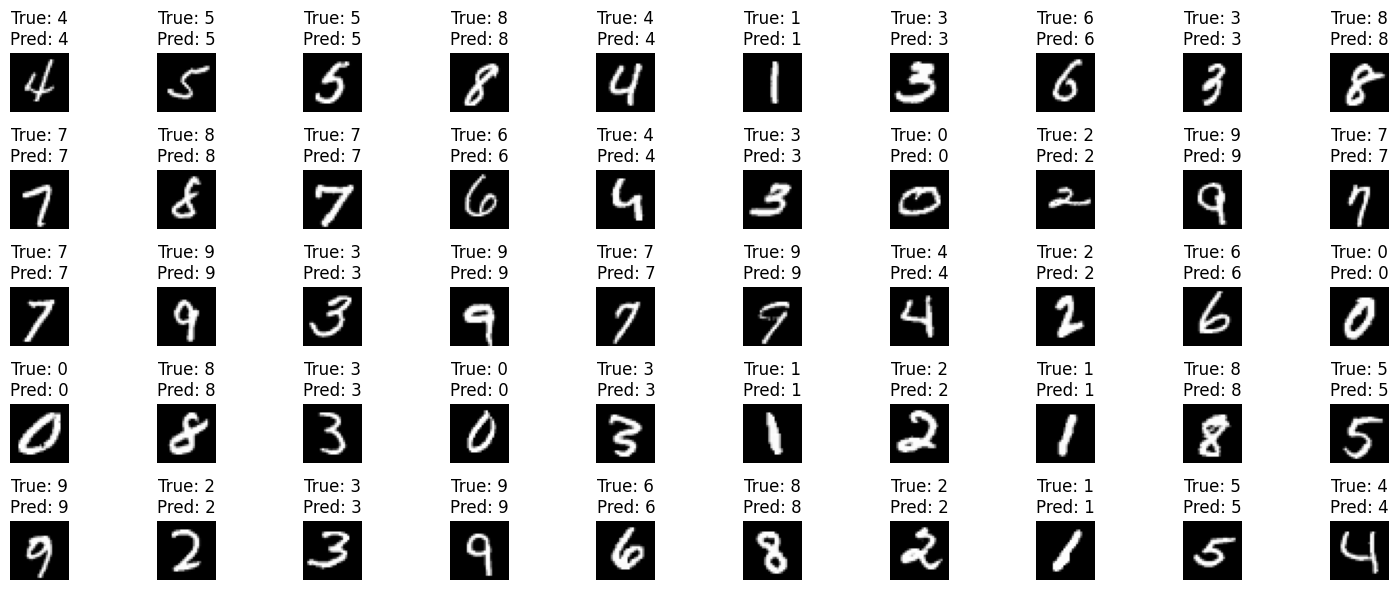

In [130]:
# Fungsi untuk menampilkan gambar dan label
def show_images(images, true_labels, predicted_labels):
    plt.figure(figsize=(15, 6))
    for i in range(len(images)):
        plt.subplot(5, 10, i + 1)
        plt.imshow(images[i][:, :, 0], cmap='gray')

        # Tentukan warna teks berdasarkan prediksi yang benar atau salah
        text_color = 'red' if true_labels[i] != predicted_labels[i] else 'black'

        plt.title(f'True: {true_labels[i]}\nPred: {predicted_labels[i]}', color=text_color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Load dataset MNIST yang sudah disiapkan sebelumnya
pickle_in = open("X_mnist.pickle", "rb")
X_test = pickle.load(pickle_in)
pickle_in = open("Y_mnist.pickle", "rb")
Y_test = pickle.load(pickle_in)

# Normalisasi data testing
X_test = X_test / 255.0

# Load model yang sudah di-training sebelumnya
model = tf.keras.models.load_model("anpr_model.keras")

# Lakukan prediksi pada data testing
predictions = model.predict(X_test)

# Ambil label yang benar (tanpa one-hot encoding)
true_labels = Y_test.argmax(axis=1)

# Ambil label prediksi (tanpa one-hot encoding)
predicted_labels = np.argmax(predictions, axis=1)

# Pilih 50 gambar secara acak untuk ditampilkan
num_samples_to_show = 50
sample_indices = np.random.choice(len(X_test), num_samples_to_show, replace=False)

# Tampilkan gambar dan labelnya
show_images(X_test[sample_indices], true_labels[sample_indices], predicted_labels[sample_indices])

### Tugas
Silakan melakukan pengenalan NIK pada e-KTP yang terdapat pada tugas modul 11!

(-0.5, 799.5, 487.5, -0.5)

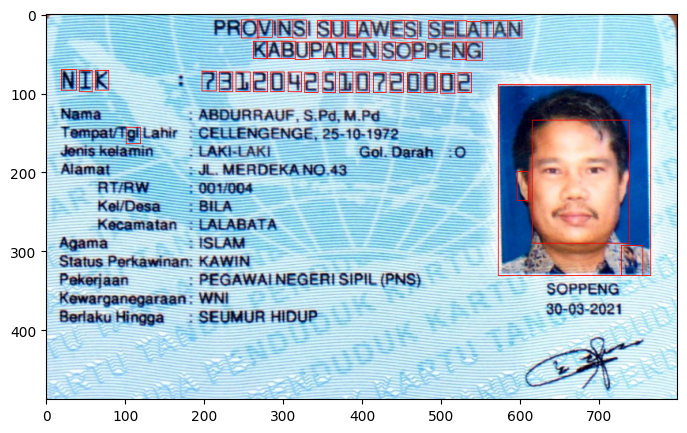

In [131]:
ktp = cv.imread("/content/drive/MyDrive/PCVK/KTP.jpg")
# Filtering
blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

# Binerisasi citra dengan Otsu's thresholding
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Morfologi erosi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

plt.figure(figsize=(15,5))
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 20 and w >= 10 and float(ras) <= 1:
        cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Gambar hasil akhir
plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.axis('on')

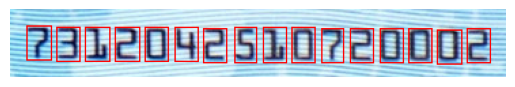

In [132]:
cropped_nik = ktp[60:110, 185:550]

plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [133]:
# Install Tesseract OCR
!sudo apt install tesseract-ocr-ind

# Install library pytesseract
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr-ind is already the newest version (1:4.00~git30-7274cfa-1.1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


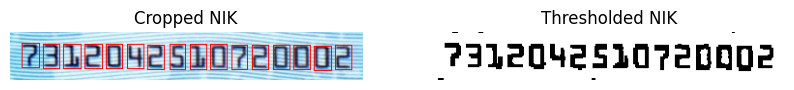

NIK pada e-KTP:  7312042510720002



In [134]:
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt

# Memuat gambar NIK yang telah dipotong (cropped_nik)
gray_nik = cv.cvtColor(cropped_nik, cv.COLOR_BGR2GRAY)

# Peningkatan kontras menggunakan CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
preprocessed_nik = clahe.apply(gray_nik)

# Operasi morfologi (penutupan) untuk menghilangkan noise dan menghubungkan elemen yang terputus
kernel = cv.getStructuringElement(cv.MORPH_RECT, (3, 3))
morphed_nik = cv.morphologyEx(preprocessed_nik, cv.MORPH_CLOSE, kernel)

# Binerisasi menggunakan threshold Otsu untuk memisahkan teks dari latar belakang
_, threshold_nik = cv.threshold(morphed_nik, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Visualisasi citra setelah pra-pemrosesan
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(cropped_nik, cv.COLOR_BGR2RGB))  # Gambar asli NIK
plt.title("Cropped NIK")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(threshold_nik, cmap='gray')  # Gambar setelah thresholding
plt.title("Thresholded NIK")
plt.axis('off')

plt.show()

# Penerapan Tesseract untuk ekstraksi teks
custom_config = r'--oem 3 --psm 6 outputbase digits'  # PSM 6 untuk teks berdampingan
nik_text = pytesseract.image_to_string(threshold_nik, config=custom_config)

# Tampilkan hasil pengenalan NIK
print("NIK pada e-KTP: ", nik_text)
